## First view of the data

(116, 10)
   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  

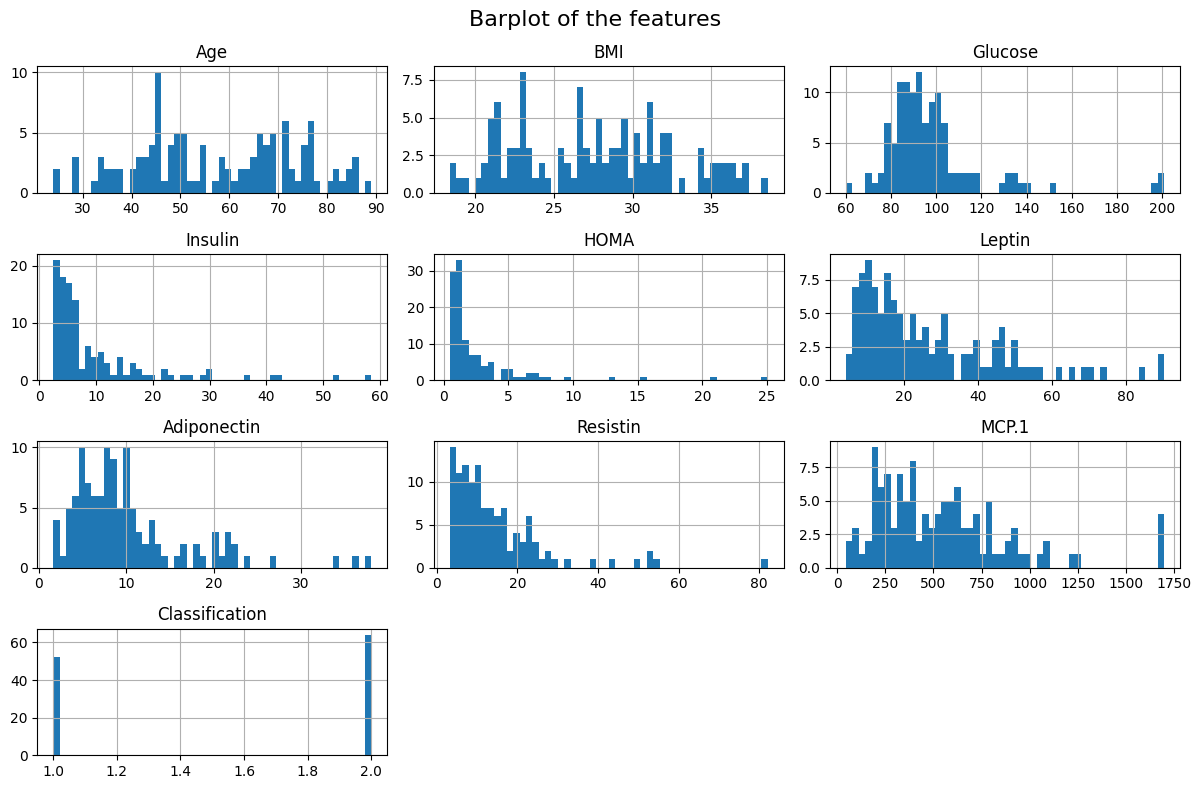

In [1]:
# Import of the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('dataR2.csv')

# View data
print(data.shape)
print(data.head())
data.info()

# Separate features and targets
features = data.columns[:-1]
print("The features are :", list(features))
target = 'Classification'

# View the distribution of the features
data.hist(bins=50, figsize=(12, 8))
plt.suptitle("Barplot of the features", fontsize=16)
plt.tight_layout()
plt.show()


### The dataset

The dataset has 116 observations on 9 explicative features and 1 target variable.
The features are continuous and have the following labels: `Age`, `BMI`, `Glucose`, `Insulin`, `HOMA`, `Leptin`, `Adiponectin`, `Resistin`, `MCP.1`.
The target variable is called `Classification` and takes the values 2 if the patient has breast cancer and 1 if the patient hasn't.

There are no missing values.

### Distribution of the variables
Certain variables have an **asymmetrical distribution** and extreme values, more specifically `Insulin`, `HOMA`, `Leptin`, `Adiponectin`, `Resistin` and `MCP.1`. We will transform and standardise the data.


## Splitting dataset between target and features


In [2]:
X = data.drop(columns='Classification')
y = data['Classification'].map({2: 1, 1: 0})
# Mapping : 1 = healthy patient (negative), 2 = sick patient(positive)
# We want : 0 = healthy patient (negative), 1 = sick patient(positive)

## Visualisation of ouliers

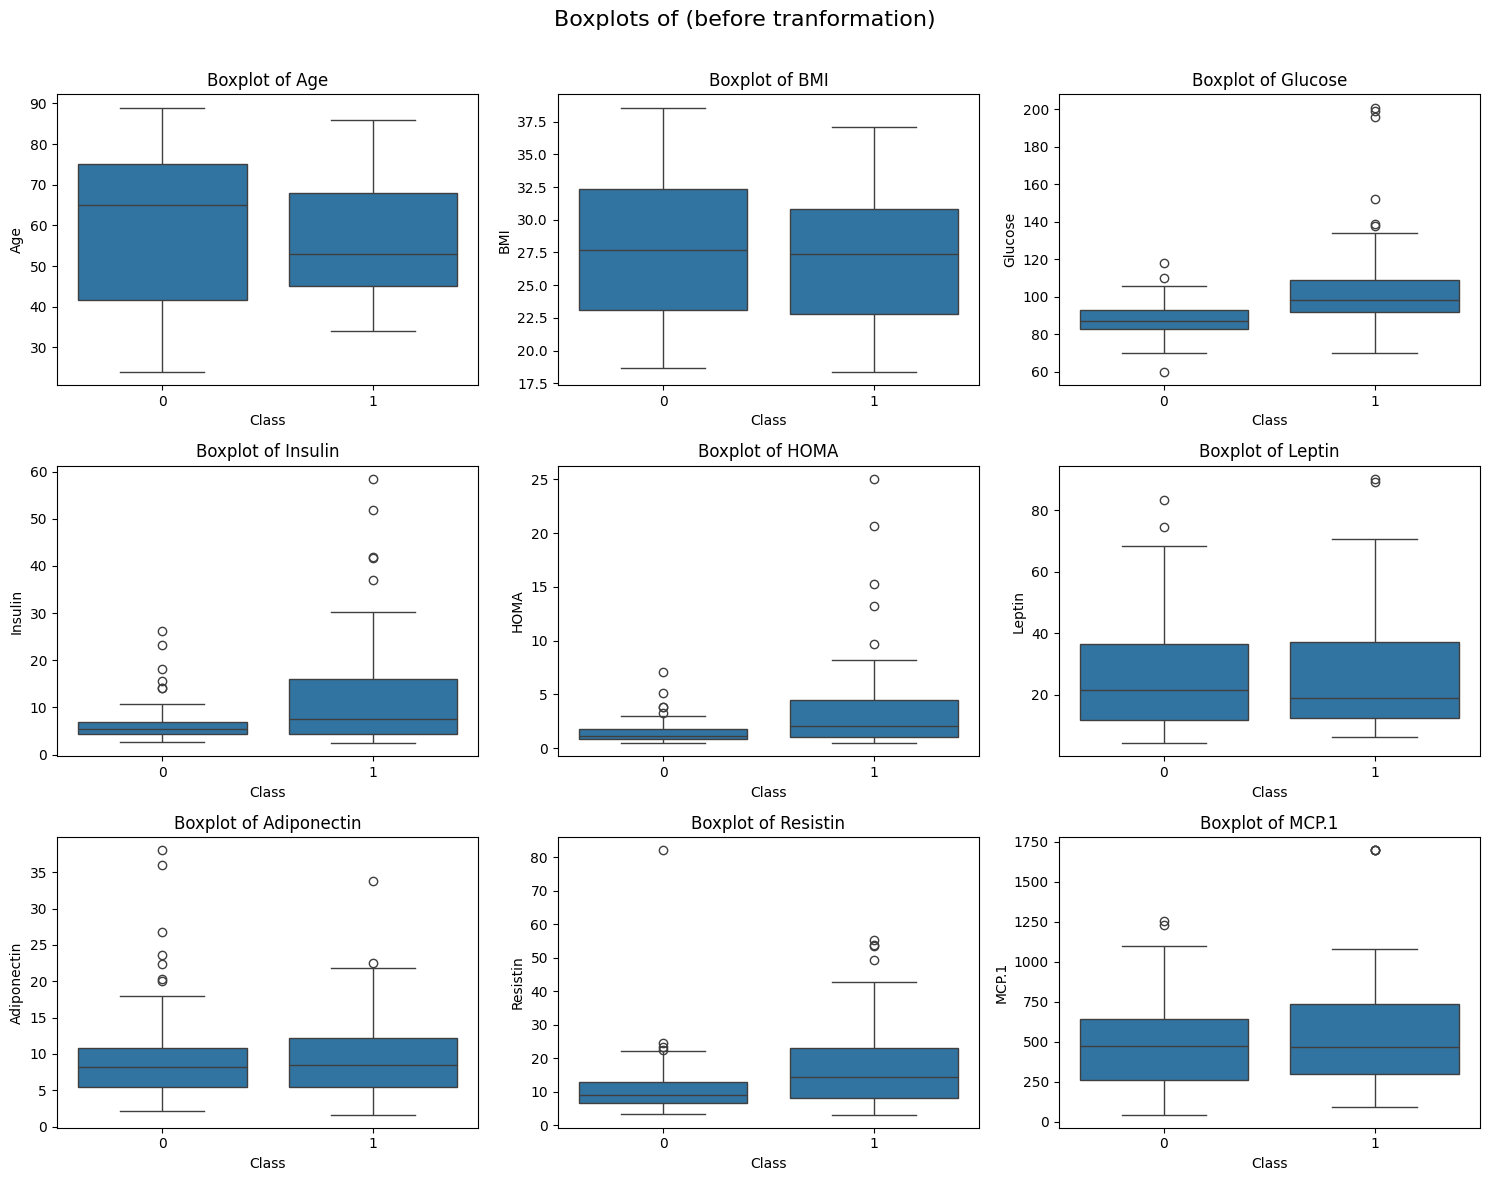

In [3]:
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

# Boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    sns.boxplot(x=y, y=X[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots of (before tranformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

we start by separating explicative features and target, and recode the latter the following way:
- `1` : sick patient (positive),
- `0` : healthy patient (negative).


## Logarithmic transformation

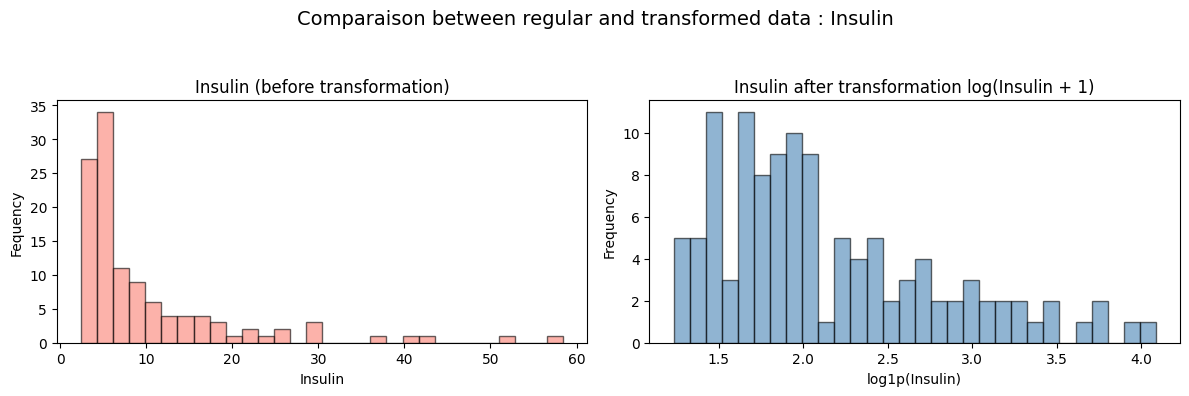

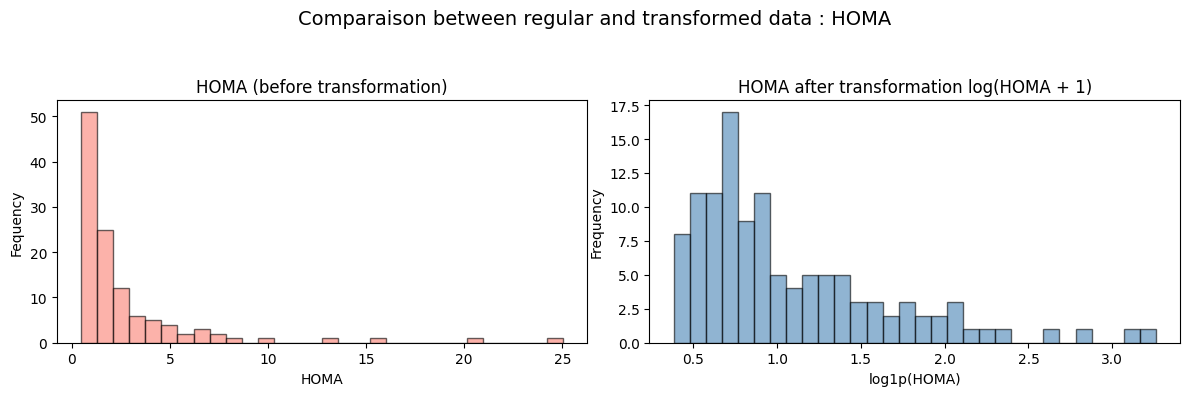

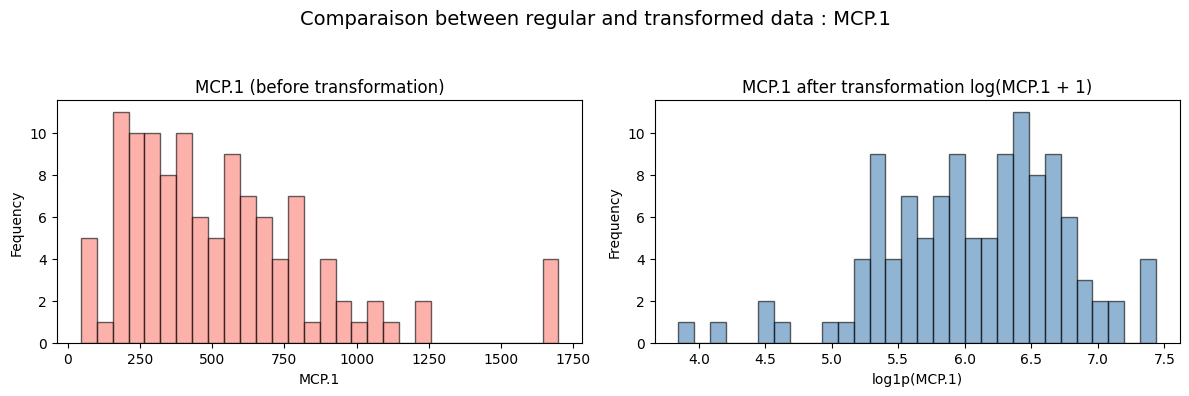

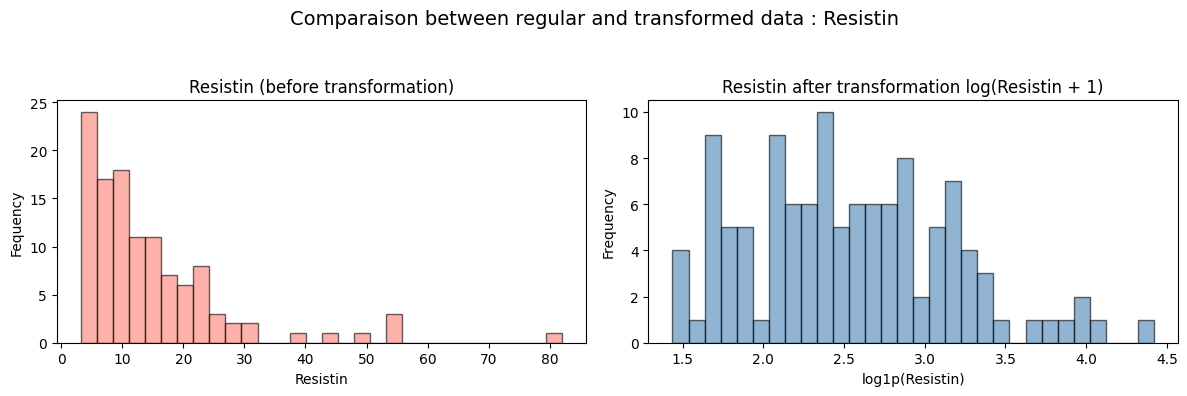

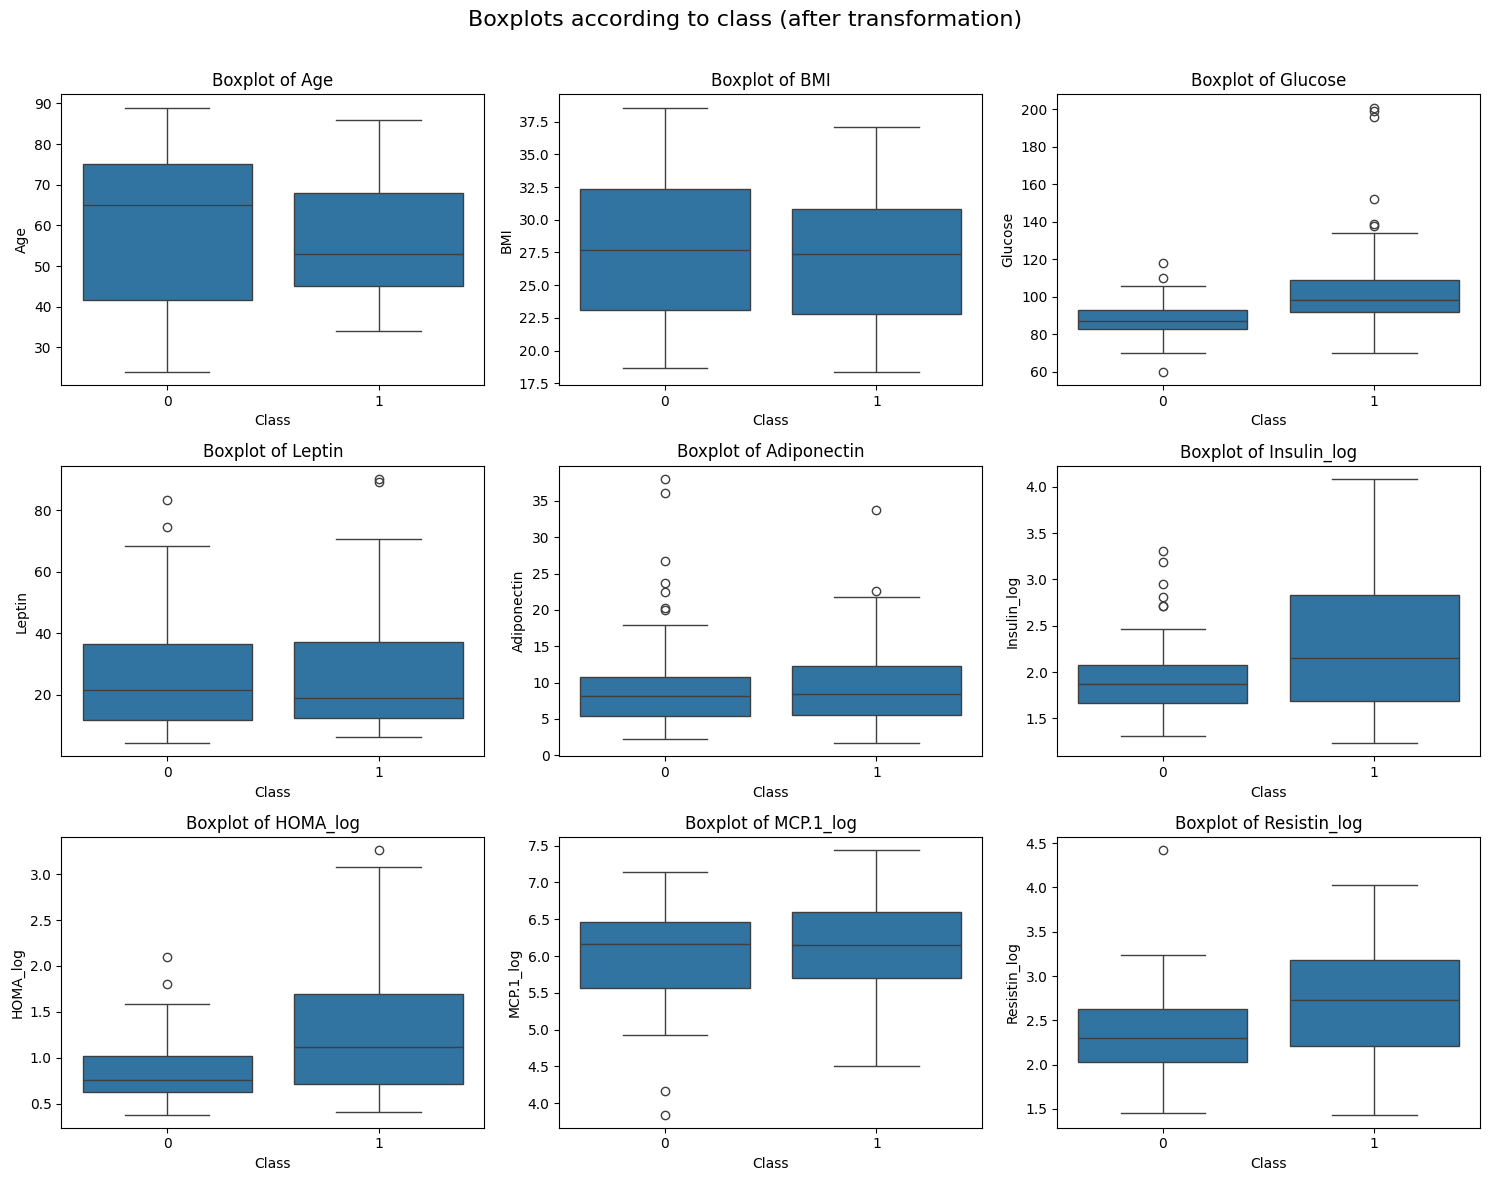

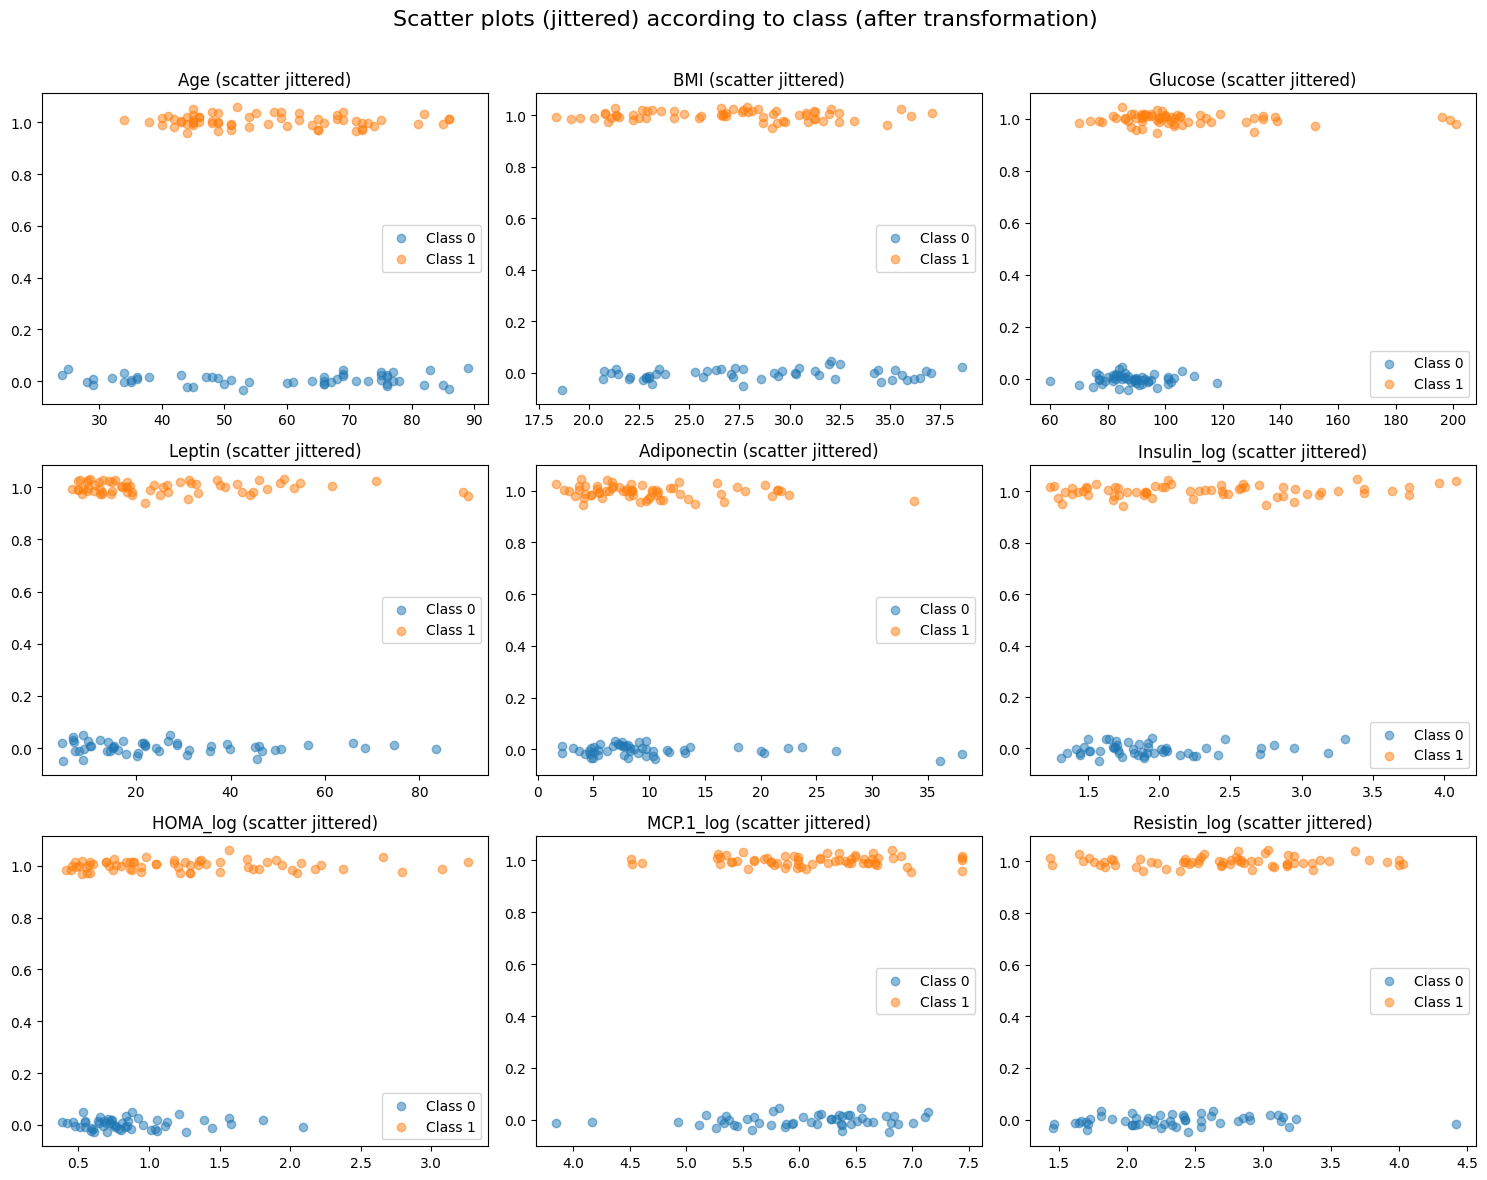

In [4]:
# List of variables we want to transform
variables_log = ['Insulin', 'HOMA', 'MCP.1', 'Resistin']

# Comparison between regular and transformed data
for col in variables_log:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # before transformation
    axes[0].hist(X[col], bins=30, alpha=0.6, color='salmon', edgecolor='black')
    axes[0].set_title(f"{col} (before transformation)")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Fequency")

    # after log1p transformation
    transformed = np.log1p(X[col])
    axes[1].hist(transformed, bins=30, alpha=0.6, color='steelblue', edgecolor='black')
    axes[1].set_title(f"{col} after transformation log({col} + 1)")
    axes[1].set_xlabel(f"log1p({col})")
    axes[1].set_ylabel("Frequency")

    plt.suptitle(f"Comparaison between regular and transformed data : {col}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

# Transformation of X
X_transformed = X.copy()
for col in variables_log:
    X_transformed[col + '_log'] = np.log1p(X[col])
X_transformed = X_transformed.drop(columns=variables_log)

# Update list of features
features = X_transformed.columns.tolist()

# Create transformed data
data2 = X_transformed.copy()
data2['Classification'] = y.values

# Boxplots according to target class

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x='Classification', y=col, data=data2, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots according to class (after transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Scatter plots jittered according to target class

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    for classe in [0, 1]:
        values = data2[data2['Classification'] == classe][col]
        jittered_y = np.random.normal(loc=classe, scale=0.02, size=values.shape)
        axes[i].scatter(values, jittered_y, alpha=0.5, label=f"Class {classe}")
    axes[i].set_title(f"{col} (scatter jittered)")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Scatter plots (jittered) according to class (after transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



### Objective of the transformation

In order to ensure these variables are distributed more symmetrically and to reduce the impact of outliers, we have applied a logarithmic transformation using `log(x+1)`with the function `np.log1p`

### Comparison

We realise that the barplots are less steep and the distributions become more compact, closer to a normal distribution curve. The dataset is now more homogeneous and further standardisation will be more impactful. These graphics are a visual representation of the impact of the logarithmic transformation.

### Updated dataset

We have added the transformed features `Insulin_log`, `HOMA_log`, `MCP.1_log` and `Resistin_log` in favor of the old, less-balanced features.

### Boxplots
The logarithmic transformation severly reduces the number of outliers.

### Scatter plots jittered
The scatter plots show the datapoints are well and horizontally separated according to class.


### Conclusion
The logarithmic transformation has reduced the impact of outliers and stabilised the standard deviation by making the distribution more compact and centered around the mean.

## Standardisation (StandardScaler)

In [5]:
print(X_transformed.columns)

Index(['Age', 'BMI', 'Glucose', 'Leptin', 'Adiponectin', 'Insulin_log',
       'HOMA_log', 'MCP.1_log', 'Resistin_log'],
      dtype='object')


In [6]:

from sklearn.preprocessing import StandardScaler

# Initialisation dof the scaler
scaler = StandardScaler()
scaler_orig = StandardScaler()

# Standardisation of the transformed data
X_scaled = scaler.fit_transform(X_transformed)
X_scaled = pd.DataFrame(X_scaled, columns=X_transformed.columns, index=X_transformed.index)
X_scaled.describe().T[['mean', 'std']]

,mean,std
Age,1.493059e-16,1.004338
BMI,-6.121779e-16,1.004338
Glucose,1.990745e-16,1.004338
Leptin,1.339924e-16,1.004338
Adiponectin,2.201304e-17,1.004338
Insulin_log,-2.277871e-16,1.004338
HOMA_log,-1.378208e-16,1.004338
MCP.1_log,-6.661338e-16,1.004338
Resistin_log,3.292386e-16,1.004338


We will also create standardised data without a logarithmic transformation to look at the impact of the logarithmic transformation on the model performance.

In [7]:
# Standardisation of the original data
X_scaled_orig = scaler_orig.fit_transform(X)
X_scaled_orig = pd.DataFrame(X_scaled_orig, columns=X.columns, index=X_transformed.index)
X_scaled_orig.describe().T[['mean', 'std']]

,mean,std
Age,1.493059e-16,1.004338
BMI,-6.121779e-16,1.004338
Glucose,1.990745e-16,1.004338
Insulin,3.158393e-17,1.004338
HOMA,1.990745e-16,1.004338
Leptin,1.339924e-16,1.004338
Adiponectin,2.201304e-17,1.004338
Resistin,2.737274e-16,1.004338
MCP.1,-1.282499e-16,1.004338


### Objectif

We want to center the variables around 0 and get their variance around 1 in order to approximate a gaussian distribution.

## Why use a Gaussian Naive Bayes?

The data of the features is continuous and non-binary. As such, we use a GaussianNB, the performance will nevertheless suffer as the features aren't all Normal distributed and the dimension is rather small, we cannot suppose normal distribution through size.

## Train/Test split for the evaluation 

In [8]:
from sklearn.model_selection import train_test_split

# Stratified split to conserve the distribution of the variables
X_transf_train, X_transf_test, y_transf_train, y_transf_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

print("Train :", X_transf_train.shape, y_transf_train.shape)
print("Test  :", X_transf_test.shape, y_transf_test.shape)


Train : (92, 9) (92,)
Test  : (24, 9) (24,)


A stratified split help preserve the original proportion of healthy and sick patients in train and test sample (to ensure the model isn't trained with an overbearing class)
The sets have the following size:
- **Training set** : 81 observations
- **Test set** : 24 observations

This is a standard 80/20 split

## Final evaluation on the dataset with transformed data

Accuracy : 0.625
F1-score : 0.571
Recall : 0.462

Classification Report with log-transformation:
              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.75      0.46      0.57        13

    accuracy                           0.62        24
   macro avg       0.66      0.64      0.62        24
weighted avg       0.66      0.62      0.62        24



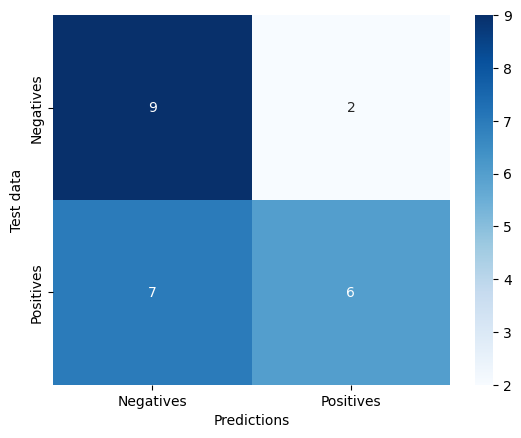

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix

#Initialize and train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_transf_train, y_transf_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_transf_test)

# Accuracy
accuracy = accuracy_score(y_transf_test, y_pred)
print(f"Accuracy : {accuracy:.3f}")

# F1-score
f1 = f1_score(y_transf_test, y_pred)
print(f"F1-score : {f1:.3f}")

# Recall
rec = recall_score(y_transf_test, y_pred)
print(f"Recall : {rec:.3f}")

# Complete report
print("\nClassification Report with log-transformation:")
print(classification_report(y_transf_test, y_pred))

## Confusion matrix
conf = sns.heatmap(confusion_matrix(y_true=y_transf_test, y_pred=y_pred), annot=True, cmap="Blues", xticklabels=["Negatives", "Positives"], yticklabels=["Negatives", "Positives"])
conf.set_xlabel("Predictions")
conf.set_ylabel("Test data")
plt.show()

We want to maximise the recall, even if it might compromise the accuracy: it is more important to find every sick patient than every healthy one. In our case, the model doesn't mark enough people as sick: only 6 out of the 13 sick patients are identified as such (46%)

## Final evaluation on the dataset with only standardised data

In [10]:
# Stratified split to conserve the distribution of the variables
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_orig, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

print("Train :", X_train.shape, y_train.shape)
print("Test  :", X_test.shape, y_test.shape)

Train : (92, 9) (92,)
Test  : (24, 9) (24,)


Accuracy : 0.667
F1-score : 0.600
Recall : 0.462

Classification Report without log-transformation :
              precision    recall  f1-score   support

           0       0.59      0.91      0.71        11
           1       0.86      0.46      0.60        13

    accuracy                           0.67        24
   macro avg       0.72      0.69      0.66        24
weighted avg       0.73      0.67      0.65        24



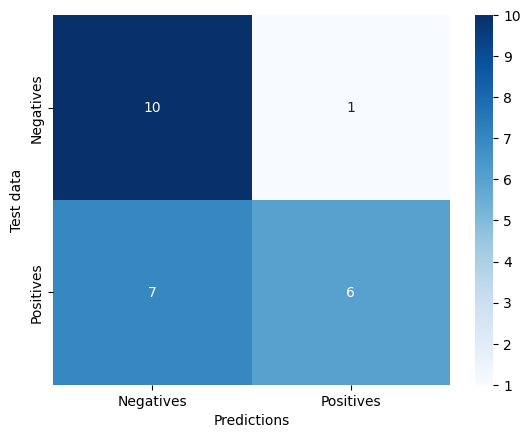

In [11]:
#Initialize and train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.3f}")

# F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score : {f1:.3f}")

# Recall
rec = recall_score(y_test, y_pred)
print(f"Recall : {rec:.3f}")

# Complete report
print("\nClassification Report without log-transformation :")
print(classification_report(y_test, y_pred))

## Confusion matrix
conf = sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True, cmap="Blues", xticklabels=["Negatives", "Positives"], yticklabels=["Negatives", "Positives"])
conf.set_xlabel("Predictions")
conf.set_ylabel("Test data")
plt.show()

So while the recall is just as bad without the log-transformation, the overall f1-score and the precision is better.

## ROC and AUC

We get the follow ROC curve:

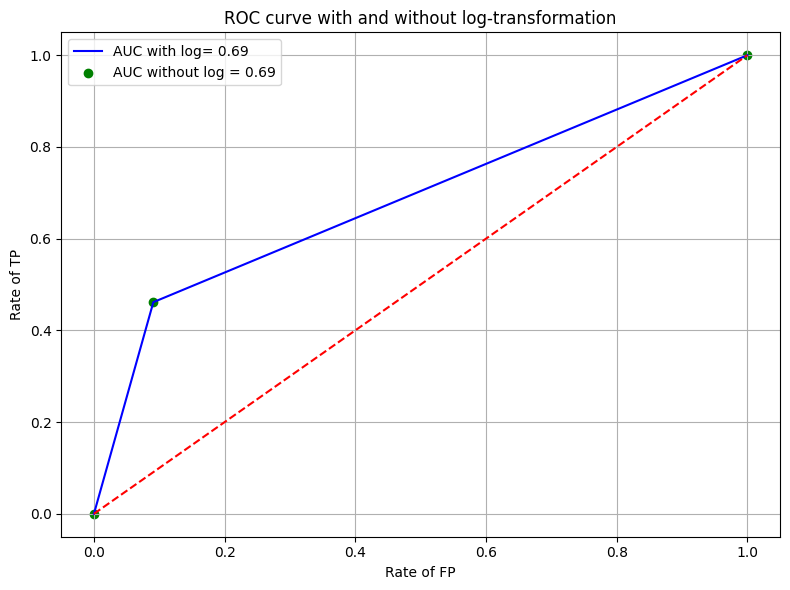

In [15]:
# Courbe ROC et AUC
from sklearn.metrics import roc_curve, auc

fpr_transf, tpr_transf, thresholds = roc_curve(y_transf_test, y_pred)
roc_auc_transf = auc(fpr_transf, tpr_transf)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_transf, tpr_transf, label=f'AUC with log= {roc_auc_transf:.2f}', color='blue')
plt.scatter(fpr, tpr, label=f'AUC without log = {roc_auc:.2f}', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title("ROC curve with and without log-transformation")
plt.xlabel("Rate of FP")
plt.ylabel("Rate of TP")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()